# **Optimizers**


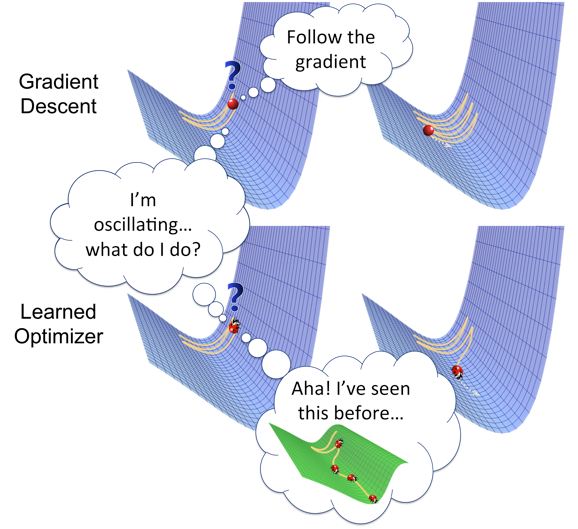

## 1. What is an Optimizer?


In deep learning, an **optimizer** is an algorithm used to adjust the weights and biases of a neural network to minimize the loss function. The loss function tells us how far the model's predictions are from the actual values. <br>

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.<br>


Without optimization, training a neural network would be inefficient, slow, or even impossible in complex, high-dimensional parameter spaces.<br>

Optimizers enable the training of massive models like GPT-3 and vision transformers.<br>
The optimizer plays a critical role in finding the best parameters (weights) that help the model perform well.


## 2. Why Do We Need Optimizers?

### a) High-Dimensional and Complex Loss Surfaces<br>

- Neural networks have millions of parameters, making the loss function's surface very high-dimensional.<br>
- This surface can have valleys (saddle point), hills, and flat regions (plateau). A simple algorithm like basic gradient descent may struggle to navigate such a surface efficiently.<br>
- Optimizers help navigate this landscape to find a minimum of the loss function efficiently.<p>

### b) Faster Convergence

- Standard gradient descent may converge very slowly due to oscillations or poor learning rates.<br>
- Some optimizers like **Adam** and **Momentum** can accelerate the convergance and help the model reach the minimum of the loss function more quickly than basic gradient descent.

### c) Avoid Getting Stuck

- Optimizers like Adam or Momentum can help the model avoid getting stuck in local minima or flat regions of the loss surface.

### d) Efficient Training

- Training large neural networks can take a long time. Optimizers are designed to reduce computation time while improving accuracy.

### e) Vanishing and Exploding Gradients

- Gradients may become very small (vanish) or very large (explode), especially in deep networks.<br>
- Optimizers like Adam or RMSProp handle these issues by using adaptive learning rates.

### f) Overfitting

- Optimizers with regularization techniques (e.g., dropout, weight decay) can help prevent overfitting.

## 3. Example: Why Optimizers Matter

### Without an Optimizer
Imagine training a deep learning model using **vanilla gradient descent**:<p>
- The model might **move too slowly** in regions where the gradient is small.<br>
- It may **oscillate** back and forth in steep regions, wasting time.<br>
- It could **stop progressing** if it gets stuck in a flat area (plateau) or saddle points.

### With a Good Optimizer
Using an advanced optimizer like **Adam** or **momentum**:
- The optimizer dynamically adjusts the learning rate for each parameter, speeding up training.<br>
- It combines techniques like momentum to smooth the updates and prevent oscillations.<br>
- It avoids flat regions and quickly finds a better solution.<br>

## 4. Types of Optimizers and Their Role

### 4.1. Gradient Descent
- Simplest and most basic optimizer.
- Updates parameters using the gradient of the loss:
  $$
  \theta_{t+1} = \theta_t - \eta \nabla J(\theta_t)
  $$
  - $\theta_t$: Current parameters.
  - $\eta$: Learning rate.
  - $\nabla J(\theta_t)$: Gradient of the loss function.

#### Challenges of Vanilla Gradient Descent
- **Slow convergence**: Especially on flat or high-curvature regions.
- **Local minima**: May get stuck in poor solutions.
- **Sensitivity to learning rate**: Choosing $\eta$ is crucial and difficult.

### 4.2. Stochastic Gradient Descent (SGD):

- Uses a random subset of data to compute gradients, making updates faster.

### 4.3. Advanced Optimizers
To address the limitations of basic gradient descent, advanced optimizers incorporate additional mechanisms:

#### 4.3.1. Momentum
- Accumulates past gradients to smooth updates and dampen oscillations.
- Helps in high-curvature regions or noisy gradients.

#### 4.3.2. RMSprop
- Scales the learning rate by dividing by the root mean square of recent gradients.
- Handles vanishing gradients by normalizing updates.

#### 4.3.3. Adam (Adaptive Moment Estimation)
- Combines the benefits of momentum and RMSprop.
- Maintains running averages of both gradients and their squares.
- Works well in most practical deep learning scenarios.



# **Exponentially Weighted Moving Average (EWMA)**

## 1. What is EWMA?
The Exponentially Weighted Moving Average (EWMA) is a technique that calculates a weighted average of past observations, where the weights decrease exponentially for older data points. This gives more importance to recent data while retaining some influence from historical data. <p>

It is based on the assumption that more recent values of a variable contribute more to the formation of the next value than precedent values .<p>
The Exponentially Weighted Moving Average (EWMA) is commonly used as a smoothing technique in time series. However, due to several computational advantages (fast, low-memory cost), the EWMA is behind the scenes of many optimization algorithms in deep learning, including Gradient Descent with Momentum, RMSprop, Adam, etc.


### Formula
The formula for EWMA is:
$$
\large v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot x_t
$$

#### Components:
- $v_t$    : The current EWMA value.
- $v_{t-1}$: The previous EWMA value.
- $\beta$  : The smoothing factor or decay rate ($0 \leq \beta < 1$).
- $x_t$    : The current data point.

#### Explanation:
- The current EWMA value, $v_t$, is a combination of:
  - A fraction ($\beta$) of the previous EWMA value ($v_{t-1}$).
  - A fraction ($1 - \beta$) of the current data point ($x_t$).



## 2. How It Works
EWMA applies exponentially decreasing weights to older data points:
$$
v_t = (1 - \beta)x_t + \beta(1 - \beta)x_{t-1} + \beta^2(1 - \beta)x_{t-2} + \dots
$$

### Key Idea:
1. The **weight of each data point** decreases exponentially as the data becomes older.
2. **Recent data points** are given more importance.
3. **Older data points** are never completely discarded but have a diminishing effect.



## 3. Impact of $\beta$ (Smoothing Factor)
The value of $\beta$ determines how much weight is assigned to recent vs. past data:<br>

- **Small $\beta$** (e.g., 0.1):
  - Reacts **quickly** to recent changes.
  - Prioritizes recent data.
- **Large $\beta$** (e.g., 0.9):
  - Reacts **slowly**, providing a **smoother average**.
  - Gives more weight to older data.



## 4. Numerical Calculation
Let’s calculate EWMA step by step for a given dataset.

#### Data:
- Observations: $x = [5, 6, 4, 7, 5]$
- Smoothing factor: $\beta = 0.8$

#### Steps:
1. Initialize $v_0 = x_1 = 5$
2. Use the formula $v_t = \beta v_{t-1} + (1 - \beta) x_t$ for each data point.

#### Step-by-step Calculation:
1. $v_1 = \beta v_0 + (1 - \beta)x_1 = 0.8 \times 5 + 0.2 \times 6 = 5.2$
2. $v_2 = \beta v_1 + (1 - \beta)x_2 = 0.8 \times 5.2 + 0.2 \times 4 = 4.96$
3. $v_3 = \beta v_2 + (1 - \beta)x_3 = 0.8 \times 4.96 + 0.2 \times 7 = 5.37$
4. $v_4 = \beta v_3 + (1 - \beta)x_4 = 0.8 \times 5.37 + 0.2 \times 5 = 5.30$

#### Results:
- $v_o = 5, v_1 = 5.2, v_2 = 4.96, v_3 = 5.37, v_4 = 5.30$


## 5. Considering a Time Series data

[*********************100%***********************]  1 of 1 completed


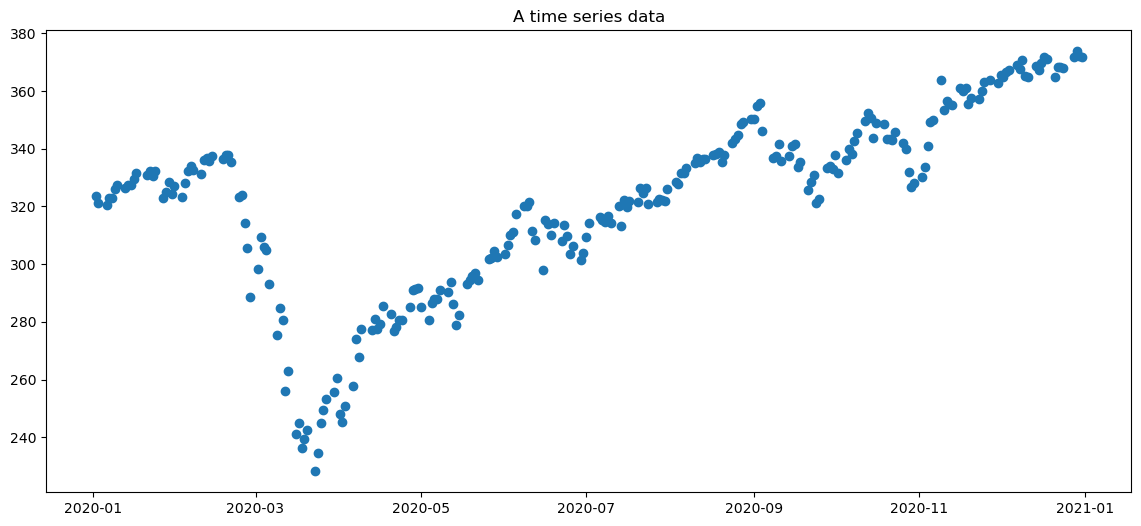

In [2]:
import pandas as pd; import datetime as dt; import matplotlib.pyplot as plt;
import yfinance as yf
import seaborn as sns
strt = dt.datetime(2020,1,1)
end = dt.datetime(2021,1,2)
data=yf.download("SPY", strt, end)
plt.figure(figsize=(14,6))
plt.scatter(data.index, data[('Open', 'SPY')])
plt.title("A time series data")
plt.show()

If we plot this in red, we can see that what we get is a moving average of the daily price, it’s like a smooth, less noisy curve.

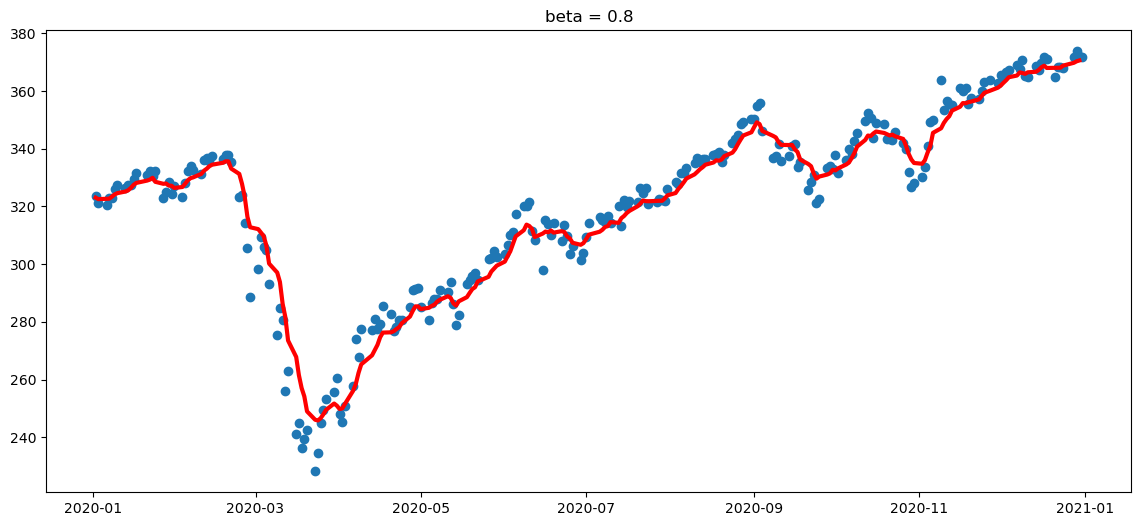

In [21]:
def momentum(data, beta=0.9):
    v_s = []
    v_prev = data[('Open', 'SPY')].iloc[0]
    for i in range(1, data.shape[0]):
        v_start = data[('Open', 'SPY')].iloc[i]
        v_new = beta * v_prev + (1-beta)*v_start
        v_s.append(v_new)
        v_prev = v_new
    return v_s
betaa = 0.8
data_1 = momentum(data, beta= betaa)
plt.figure(figsize=(14,6))
plt.scatter(data.index, data[('Open', 'SPY')])
plt.plot(data.index[:-1], data_1, linewidth=3, color='red')
plt.title(f"beta = {betaa}")
plt.show()

Comparing multiple beta values

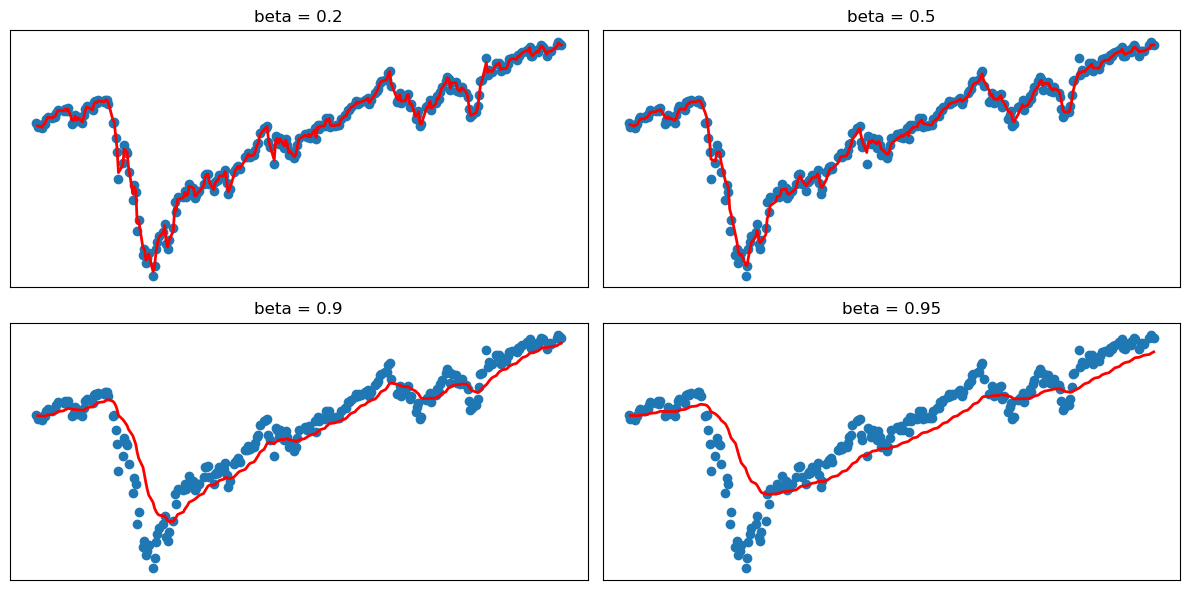

In [24]:
fig, ax = plt.subplots(2,2,figsize=(12, 6))
betas = [0.2, 0.5, 0.9, 0.95]
for i in range(len(betas)):
    ax[i//2, i%2].scatter(data.index, data[('Open', 'SPY')])
    ax[i//2, i%2].plot(data.index[1:], momentum(data, beta=betas[i]), linewidth=2, color='red')
    ax[i//2, i%2].set_title(f"beta = {betas[i]}")
    # ax[i//2, i%2].tick_params(axis='x', labelrotation=30)
    ax[i//2, i%2].set_xticks([])
    ax[i//2, i%2].set_yticks([])
plt.tight_layout()

## 6. Intuition behind EWMA
Lets explain a bit more the general equation:
$$
\large v_t = \overbrace{\beta \cdot v_{t-1}}^{\textcolor{red}{\text{trend}}} + \underbrace{(1 - \beta) \cdot x_t}_{\textcolor{red}{\text{current value}}}
$$

We can see that the value of $\beta$ determines how important the previous value is (the trend), and $(1-\beta)$ how important the current value is.<p>
Take a value of $\beta = 0.95$ and plot, notice that the curve is smoother because the trend now is more important (and the current price value is less important), so it will adapt more slowly when the price changes.<p>

Lets try the other extreme and set $\beta = 0.5$, this way the graph we get is noisier, because it is more susceptible to the current values (and this includes outliers).<br>
It adapts more quickly to recent changes in price.

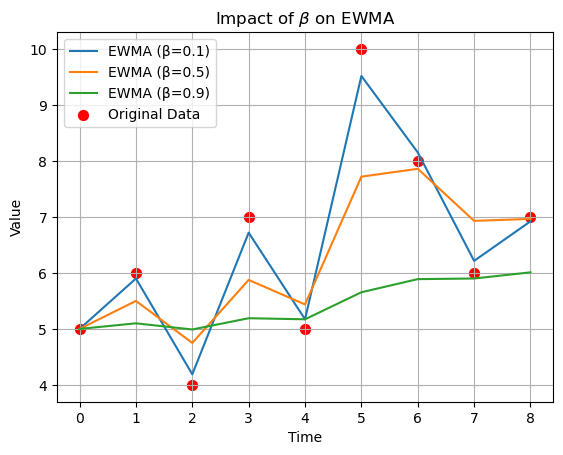

In [4]:
data = [5, 6, 4, 7, 5, 10, 8, 6, 7]
indexx = [i for i in range(len(data))]
beta_values = [0.1, 0.5, 0.9]


def ewma(data, beta):
    v = data[0] 
    ewma_values = [v]
    for x in data[1:]:
        v = beta * v + (1 - beta) * x
        ewma_values.append(v)
    return ewma_values

# Plot
for beta in beta_values:
    ewma_values = ewma(data, beta)
    plt.plot(ewma_values, label=f"EWMA (β={beta})")

plt.scatter(indexx, data, label="Original Data", marker="o", s=50, color = "red")
plt.title(r"Impact of $\beta$ on EWMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

##### Low $\beta$ (e.g., $\beta = 0.1$)

- **Behavior**:
  - Gives more weight to recent data ($1 - \beta$ is large).
  - Reacts quickly to changes or noise in the data.
  - Results in a less smooth curve that closely follows the data points.
- **Interpretation**:
  - We can think of this as "overfitting" to recent data because the moving average reflects every fluctuation, even noise.


##### High $\beta$ (e.g., $\beta = 0.9$)
- **Behavior**:
  - Gives more weight to historical data ($\beta$ is large).
  - Reacts slowly to new data points.
  - Results in a smoother curve that may lag behind significant trends.
- **Interpretation**:
  - We can think of this as "underfitting" because the moving average ignores small changes and emphasizes long-term trends.

$$\beta = \frac{2}{n+1}$$
where, $n$ = number of past data points contributing significantly to the moving average.<p>

This formula provides a way to approximate $\beta$ based on the desired "smoothing window" size ($n$).

#### Example
1. **Given $n=19$**:
    <br>
    $\beta = \frac{2}{n+1} = \frac{2}{19+1} = \frac{2}{20} = 0.1$
    <p>
    This corresponds to an EWMA with a "memory" equivalent to the last 20 data points when $\beta = 0.1$.

2. **Given $n=9$**:
    <br>
    $\beta = \frac{2}{n+1} = \frac{2}{9+1} = \frac{2}{10} = 0.5$
    <p>
    This corresponds to an EWMA with a "memory" equivalent to the last 10 data points when $\beta = 0.5$.

### Another Mathematical intuition,

We begin with the recurrence relation for the exponentially weighted moving average (EWMA):

$$
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot x_t
$$

Where:

- $v_t$ is the moving average at time $t$,<br>
- $x_t$ is the input (e.g., gradient) at time $t$,<br>
- $\beta$ is a constant hyperparameter that controls the decay rate.<br>

Let’s explore this equation step by step:

- At $t = 0$, $v_0 = x_1$.
- At $t = 1$, the update is:

$$
v_1 \textcolor{magenta}{=} \beta \cdot v_0 + (1 - \beta) \cdot x_2 \textcolor{magenta}{=} \beta \cdot x_1 + (1 - \beta) \cdot x_2
$$

- At $t \textcolor{magenta}{=} 2$, the update is:

$$
v_2 \textcolor{magenta}{=} \beta \cdot v_1 + (1 - \beta) \cdot x_3 \textcolor{magenta}{=} \beta \cdot [\beta \cdot x_1 + (1 - \beta) \cdot x_2] + (1 - \beta) \cdot x_3
$$

Expanding this:

$$
v_2 \textcolor{magenta}{=} \beta^2 \cdot x_1 + \beta(1 - \beta) \cdot x_2 + (1 - \beta) \cdot x_3
$$

- At $t \textcolor{magenta}{=} 3$, we get:

$$
v_3 \textcolor{magenta}{=} \beta \cdot v_2 + (1 - \beta) \cdot x_4 \textcolor{magenta}{=} \beta \cdot [\beta^2 \cdot x_1 + \beta(1 - \beta) \cdot x_2 + (1 - \beta) \cdot x_3] + (1 - \beta) \cdot x_4
$$

Expanding this:

$$
v_3 \textcolor{magenta}{=} \beta^3 \cdot x_1 + \beta^2(1 - \beta) \cdot x_2 + \beta(1 - \beta) \cdot x_3 + (1 - \beta) \cdot x_4
$$

Or more compactly:

$$
v_3 \textcolor{magenta}{=} \beta^3 \cdot x_1 + (1 - \beta) \left[\beta^2 \cdot x_2 + \beta \cdot x_3 + x_4 \right]
$$

### Generalization:
For $0 < \beta < 1$, as we keep expanding the equation, it becomes clear that each new value $ v_t $ is a weighted sum of all previous inputs, with exponentially decaying weights. 

Specifically, $\beta^3 < \beta^2 < \beta$, implying that the influence of older values diminishes over time. Thus, recent values (or updates in the case of deep learning optimizers) contribute more to the final result.

This behavior makes the EWMA a useful tool in optimizers like Adam, where the moving average of gradients and squared gradients is used to adjust learning rates and stabilize optimization.


## 7. Applications

1. **Time Series Analysis**:
   - Smoothing noisy data.
2. **Finance**:
   - Tracking trends in stock prices or financial metrics.
3. **Deep Learning**:
   - Used in optimizers like Adam for gradient smoothing.
4. **Process Control**:
   - Monitoring and detecting changes in production quality.

## 8. Advantages

- Simple to implement.
- Adaptive to recent changes.
- Smooths out noise effectively.

## 9. Disadvantages

- Requires tuning of $\beta$.
- Sensitive to outliers if too small.
